In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('/content/properties_2016.csv')

<ipython-input-95-69d0f3adc9e3>:1: DtypeWarning:

Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [96]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2985217 non-null  int64  
 1   airconditioningtypeid         811519 non-null   float64
 2   architecturalstyletypeid      6061 non-null     float64
 3   basementsqft                  1628 non-null     float64
 4   bathroomcnt                   2973755 non-null  float64
 5   bedroomcnt                    2973767 non-null  float64
 6   buildingclasstypeid           12629 non-null    float64
 7   buildingqualitytypeid         1938488 non-null  float64
 8   calculatedbathnbr             2856305 non-null  float64
 9   decktypeid                    17096 non-null    float64
 10  finishedfloor1squarefeet      202717 non-null   float64
 11  calculatedfinishedsquarefeet  2929652 non-null  float64
 12  finishedsquarefeet12        

In [97]:
important_cols = [
    'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet',
    'fips', 'fullbathcnt', 'garagecarcnt', 'heatingorsystemtypeid', 'latitude', 'longitude',
    'poolcnt', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip',
    'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'lotsizesquarefeet', 'numberofstories'
]

# Selecting only the relevant columns for the house price prediction task
df = df[important_cols]

# Displaying the remaining columns after dropping unnecessary ones
print(df.columns.tolist())

['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'garagecarcnt', 'heatingorsystemtypeid', 'latitude', 'longitude', 'poolcnt', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'lotsizesquarefeet', 'numberofstories']


In [98]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bathroomcnt                   2973755 non-null  float64
 1   bedroomcnt                    2973767 non-null  float64
 2   buildingqualitytypeid         1938488 non-null  float64
 3   calculatedfinishedsquarefeet  2929652 non-null  float64
 4   fips                          2973780 non-null  float64
 5   fullbathcnt                   2856305 non-null  float64
 6   garagecarcnt                  883267 non-null   float64
 7   heatingorsystemtypeid         1806401 non-null  float64
 8   latitude                      2973780 non-null  float64
 9   longitude                     2973780 non-null  float64
 10  poolcnt                       517534 non-null   float64
 11  propertycountylandusecode     2972940 non-null  object 
 12  regionidcity                

In [99]:
# Filling missing values with fixed values based on domain knowledge
df['fullbathcnt'] = df['fullbathcnt'].fillna(0)
df['garagecarcnt'] = df['garagecarcnt'].fillna(0)
df['poolcnt'] = df['poolcnt'].fillna(0)
df['numberofstories'] = df['numberofstories'].fillna(1)

In [100]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bathroomcnt                   2973755 non-null  float64
 1   bedroomcnt                    2973767 non-null  float64
 2   buildingqualitytypeid         1938488 non-null  float64
 3   calculatedfinishedsquarefeet  2929652 non-null  float64
 4   fips                          2973780 non-null  float64
 5   fullbathcnt                   2985217 non-null  float64
 6   garagecarcnt                  2985217 non-null  float64
 7   heatingorsystemtypeid         1806401 non-null  float64
 8   latitude                      2973780 non-null  float64
 9   longitude                     2973780 non-null  float64
 10  poolcnt                       2985217 non-null  float64
 11  propertycountylandusecode     2972940 non-null  object 
 12  regionidcity                

In [101]:
# Dropping rows where regionidzip is missing
df = df.dropna(subset=['regionidzip'])

# Filling categorical columns with the most frequent value
df['buildingqualitytypeid'] = df['buildingqualitytypeid'].fillna(df['buildingqualitytypeid'].mode()[0])
df['heatingorsystemtypeid'] = df['heatingorsystemtypeid'].fillna(df['heatingorsystemtypeid'].mode()[0])
df['propertycountylandusecode'] = df['propertycountylandusecode'].fillna(df['propertycountylandusecode'].mode()[0])
df['regionidcity'] = df['regionidcity'].fillna(df['regionidcity'].mode()[0])

# Filling continuous columns with median
continuous_cols = [
    'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
    'roomcnt', 'yearbuilt', 'lotsizesquarefeet'
]

for col in continuous_cols:
    df[col] = df[col].fillna(df[col].median())


<ipython-input-101-0d42a9a5e9e5>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2971237 entries, 0 to 2973779
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bathroomcnt                   2971237 non-null  float64
 1   bedroomcnt                    2971237 non-null  float64
 2   buildingqualitytypeid         2971237 non-null  float64
 3   calculatedfinishedsquarefeet  2971237 non-null  float64
 4   fips                          2971237 non-null  float64
 5   fullbathcnt                   2971237 non-null  float64
 6   garagecarcnt                  2971237 non-null  float64
 7   heatingorsystemtypeid         2971237 non-null  float64
 8   latitude                      2971237 non-null  float64
 9   longitude                     2971237 non-null  float64
 10  poolcnt                       2971237 non-null  float64
 11  propertycountylandusecode     2971237 non-null  object 
 12  regionidcity                  297

## Removing Outliers (Bsaed on data type and behaviour) considering domain knowledge

In [103]:
# Removing unrealistic rows based on domain knowledge

# Bathroom count between 1 and 10
df = df[(df['bathroomcnt'] >= 1) & (df['bathroomcnt'] <= 10)]

# Bedroom count between 1 and 10
df = df[(df['bedroomcnt'] >= 1) & (df['bedroomcnt'] <= 10)]

# Finished square feet up to 10,000
df = df[df['calculatedfinishedsquarefeet'] <= 10000]

# Room count between 1 and 15
df = df[(df['roomcnt'] >= 1) & (df['roomcnt'] <= 15)]

# Lot size up to 75,000 square feet
df = df[df['lotsizesquarefeet'] <= 75000]

# Garage car count up to 6
df = df[df['garagecarcnt'] <= 6]

# Pool count up to 5
df = df[df['poolcnt'] <= 5]

# Number of stories between 1 and 5
df = df[(df['numberofstories'] >= 1) & (df['numberofstories'] <= 5)]


In [104]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 659963 entries, 297 to 2973763
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bathroomcnt                   659963 non-null  float64
 1   bedroomcnt                    659963 non-null  float64
 2   buildingqualitytypeid         659963 non-null  float64
 3   calculatedfinishedsquarefeet  659963 non-null  float64
 4   fips                          659963 non-null  float64
 5   fullbathcnt                   659963 non-null  float64
 6   garagecarcnt                  659963 non-null  float64
 7   heatingorsystemtypeid         659963 non-null  float64
 8   latitude                      659963 non-null  float64
 9   longitude                     659963 non-null  float64
 10  poolcnt                       659963 non-null  float64
 11  propertycountylandusecode     659963 non-null  object 
 12  regionidcity                  659963 non-null 

## Feature Engineering (Adding a few columns which we believe would enhance our model)

In [105]:
# Creating house_age feature based on 2016 as reference year
df['house_age'] = 2016 - df['yearbuilt']

# Creating total_rooms feature as the sum of bathroom, bedroom, and room counts
df['total_rooms'] = df['bathroomcnt'] + df['bedroomcnt'] + df['roomcnt']


## EDA

In [106]:
# Displaying basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Displaying descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Checking for any missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (659963, 22)

Data Types:
 bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedfinishedsquarefeet    float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
poolcnt                         float64
propertycountylandusecode        object
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
lotsizesquarefeet               float64
numberofstories                 float64
house_age                       float64
total_rooms                     float64
dtype: object

Descriptive Statistics:
          bathroomcnt     bedroomcnt  b

In [107]:
# Dropping rows where taxvaluedollarcnt (target) is missing
df = df.dropna(subset=['taxvaluedollarcnt'])


In [108]:
# Checking for any missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
garagecarcnt                    0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
poolcnt                         0
propertycountylandusecode       0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
lotsizesquarefeet               0
numberofstories                 0
house_age                       0
total_rooms                     0
dtype: int64


## Univariate Analysis (Numerical Features)

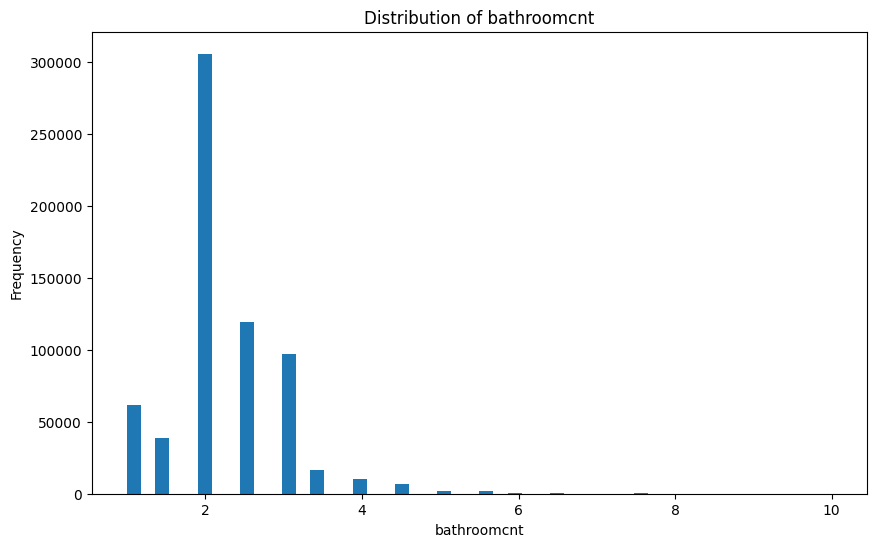

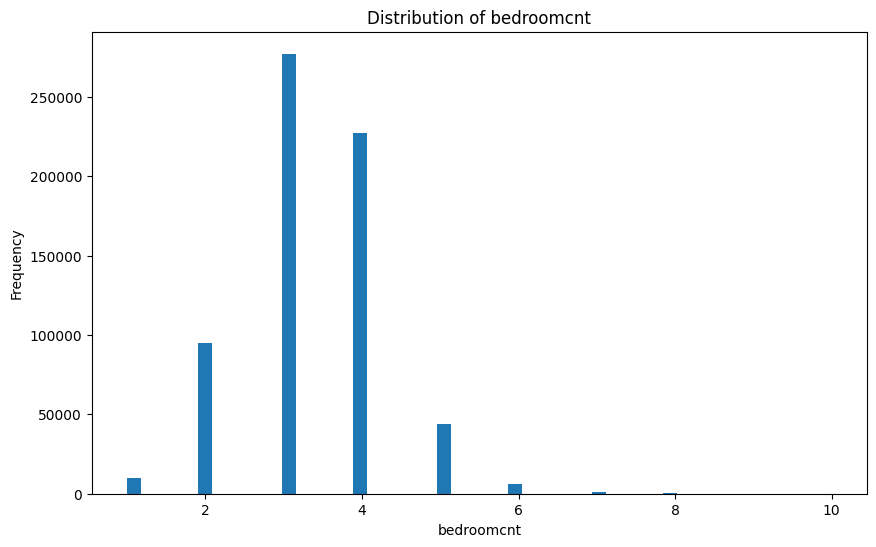

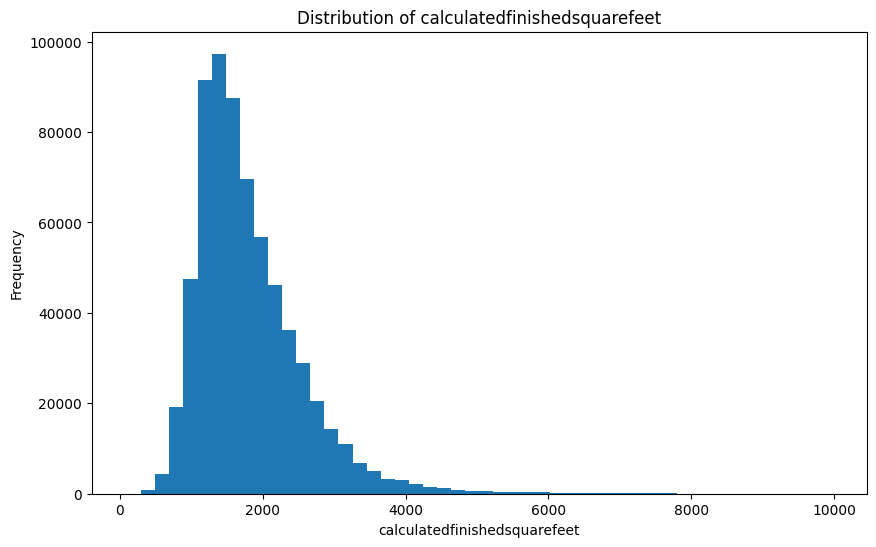

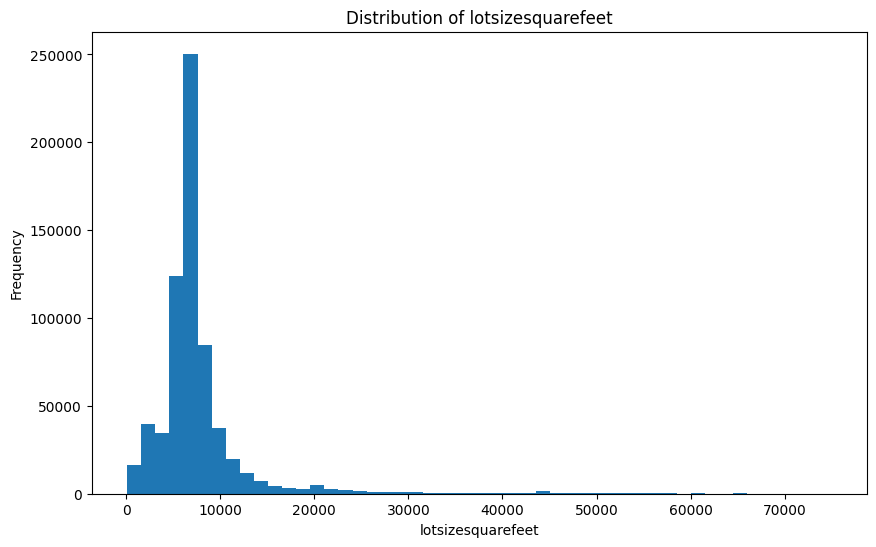

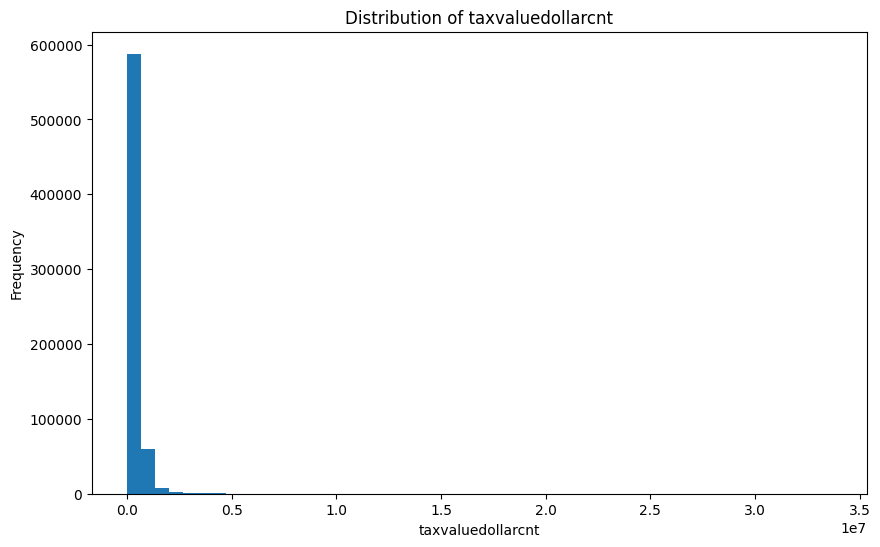

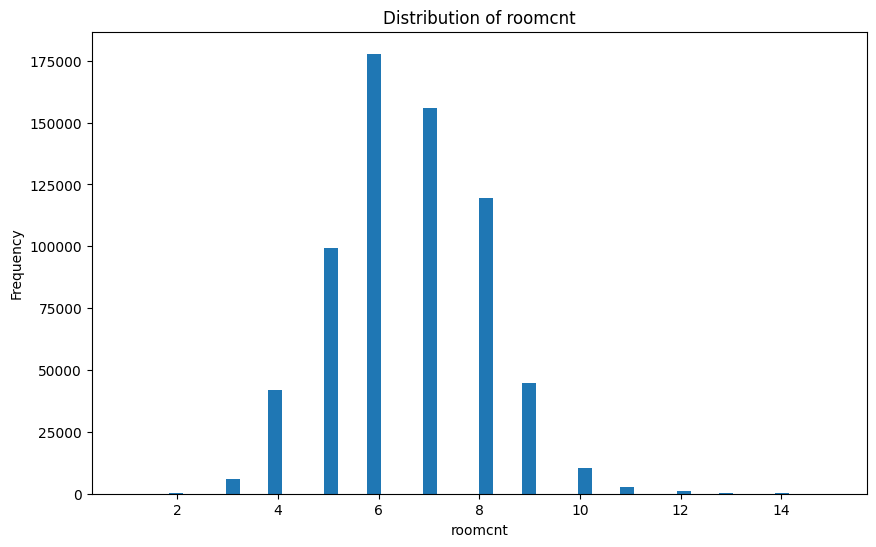

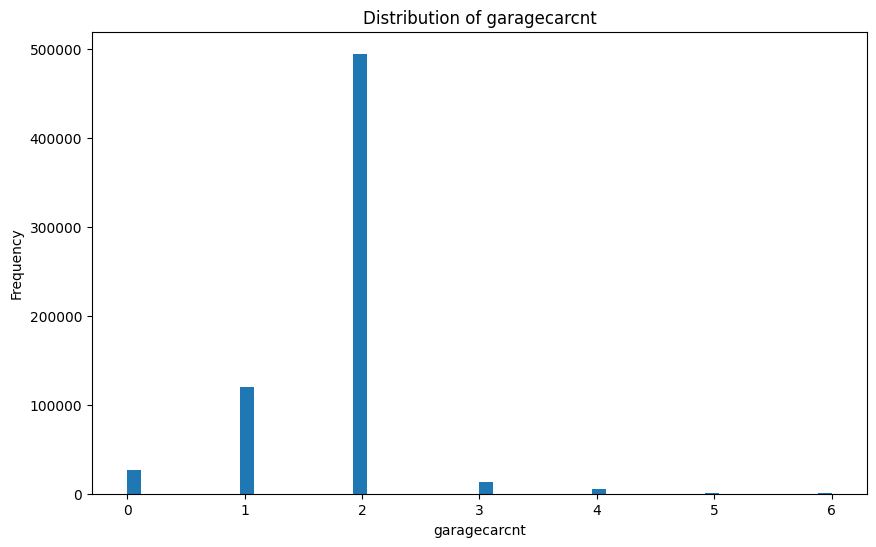

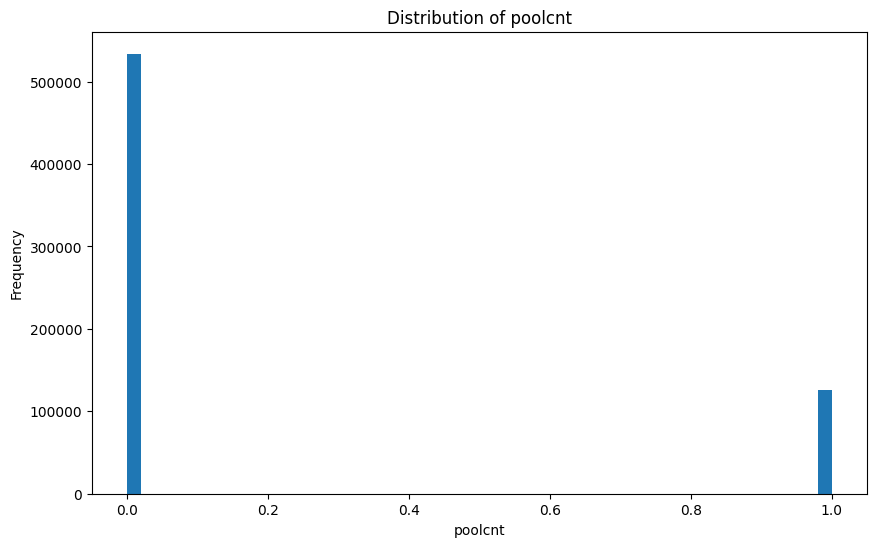

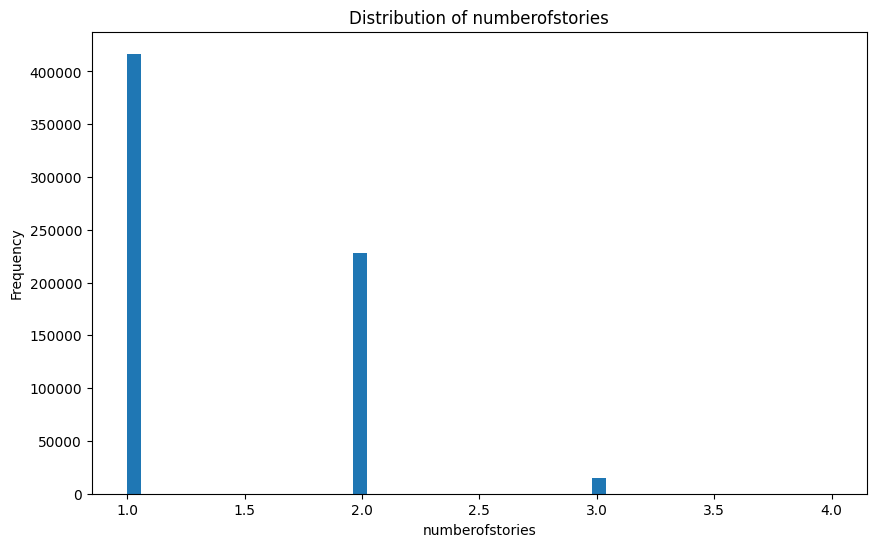

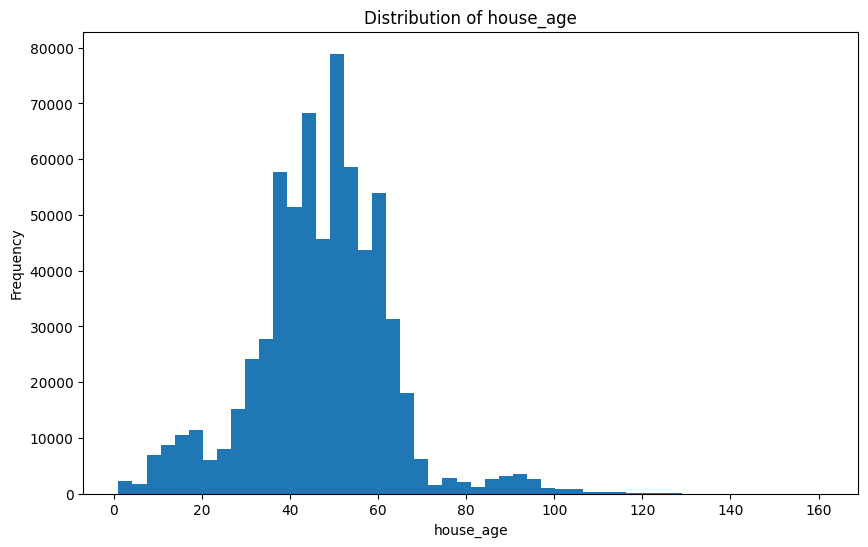

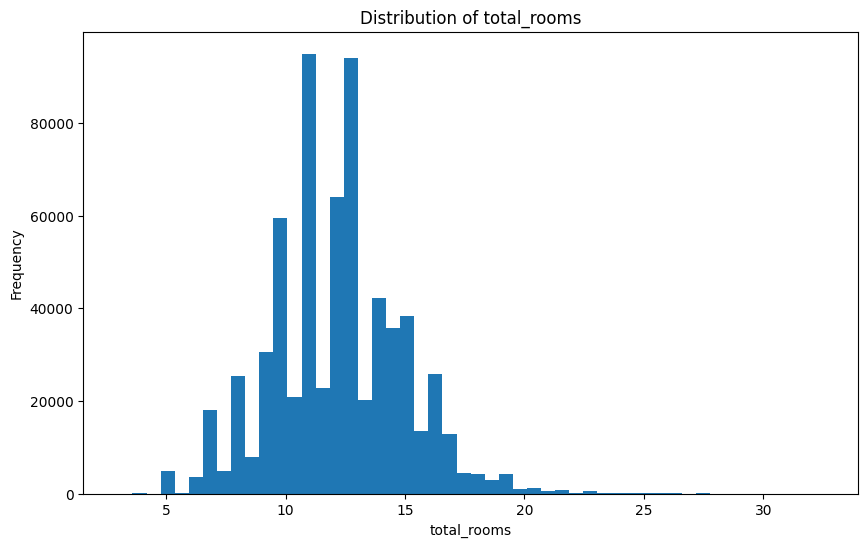

In [109]:
import matplotlib.pyplot as plt

# Updated list of numeric columns to plot
numeric_cols = [
    'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet',
    'taxvaluedollarcnt', 'roomcnt', 'garagecarcnt', 'poolcnt',
    'numberofstories', 'house_age', 'total_rooms'
]

# Plotting histograms
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

## Boxplots for Numeric Features

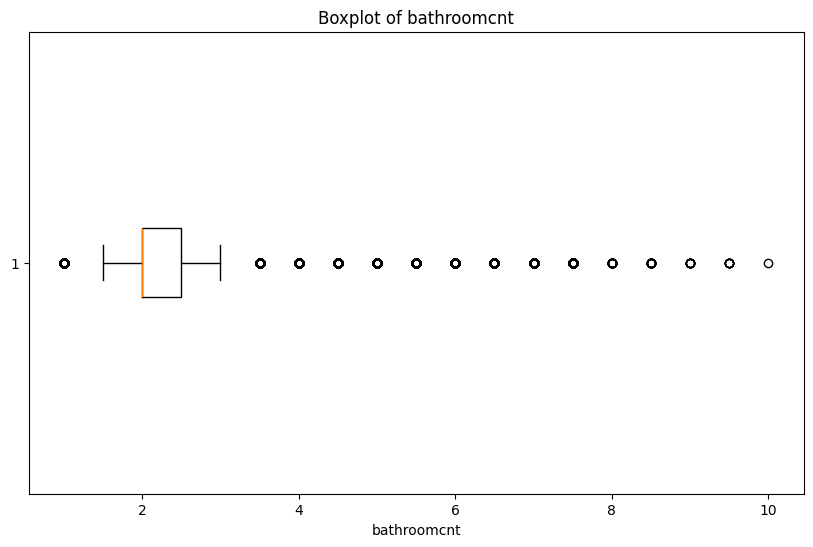

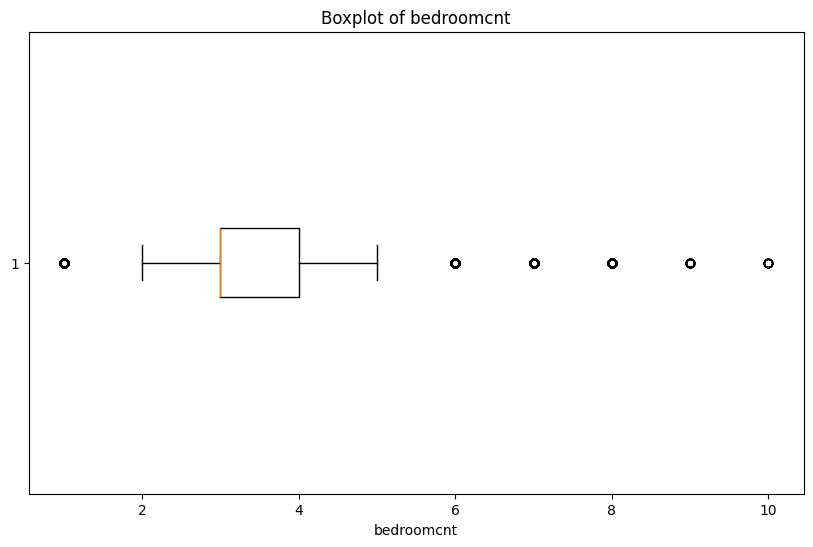

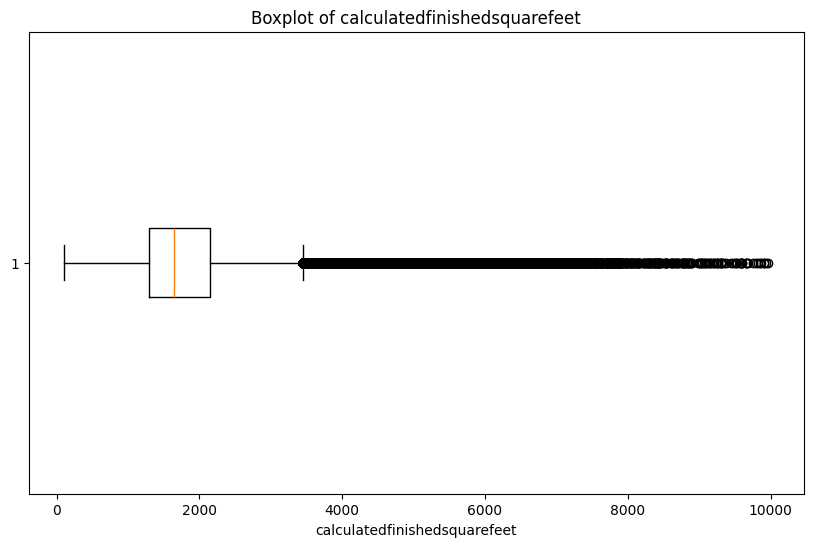

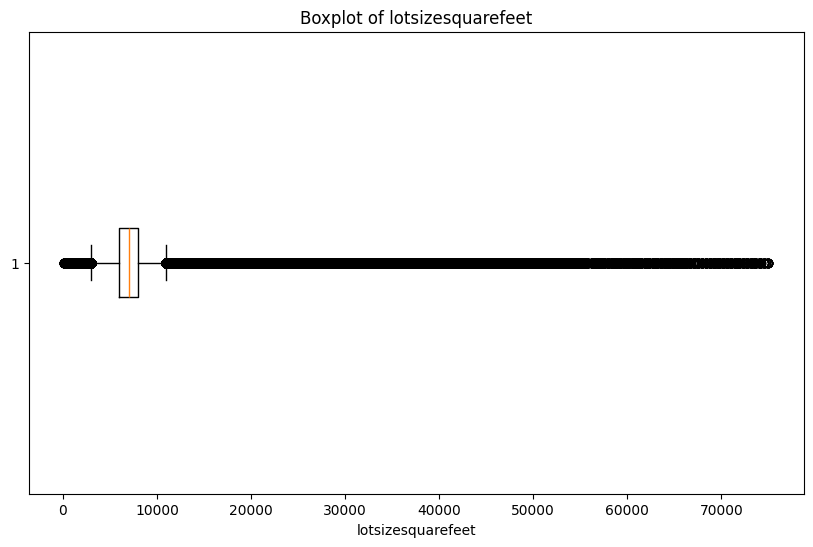

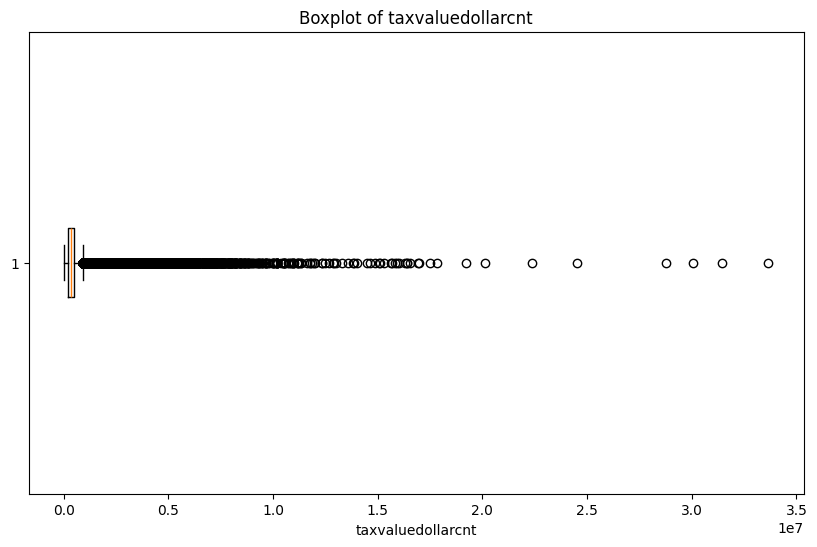

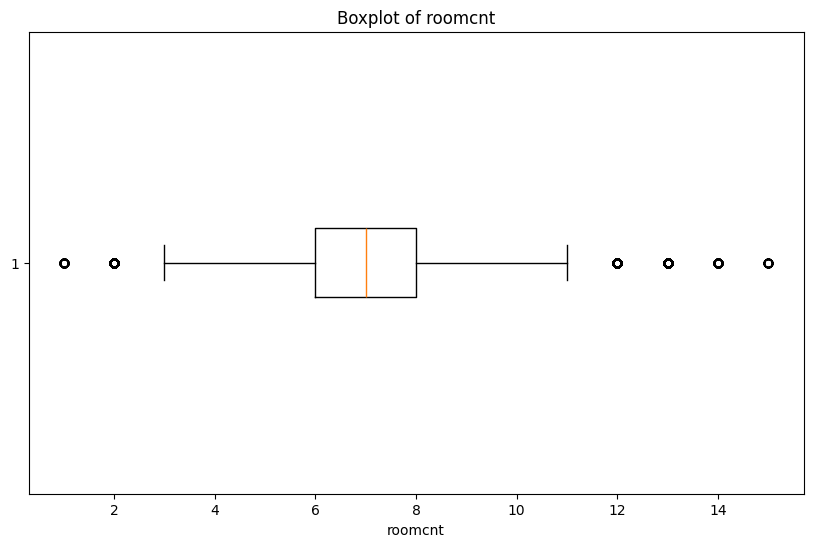

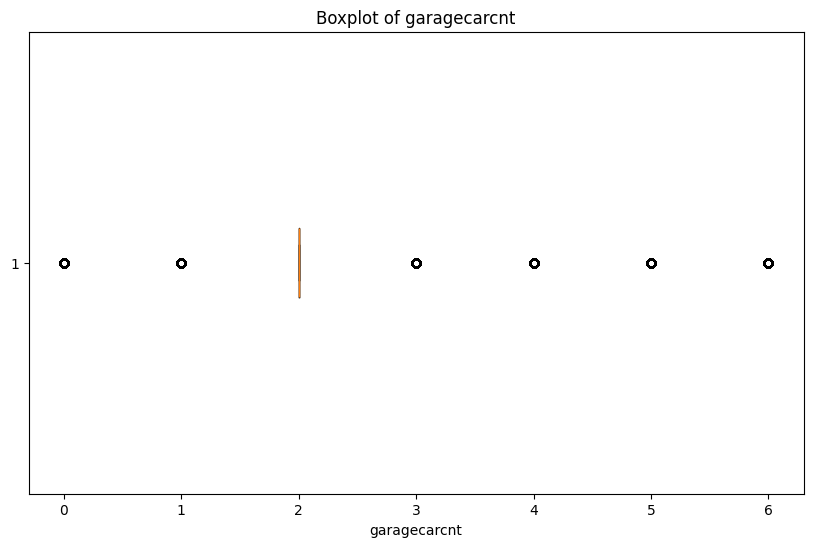

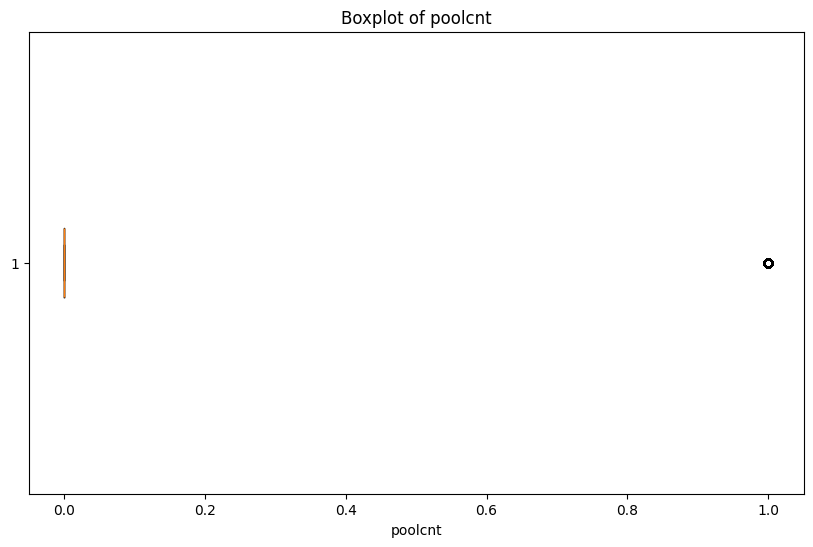

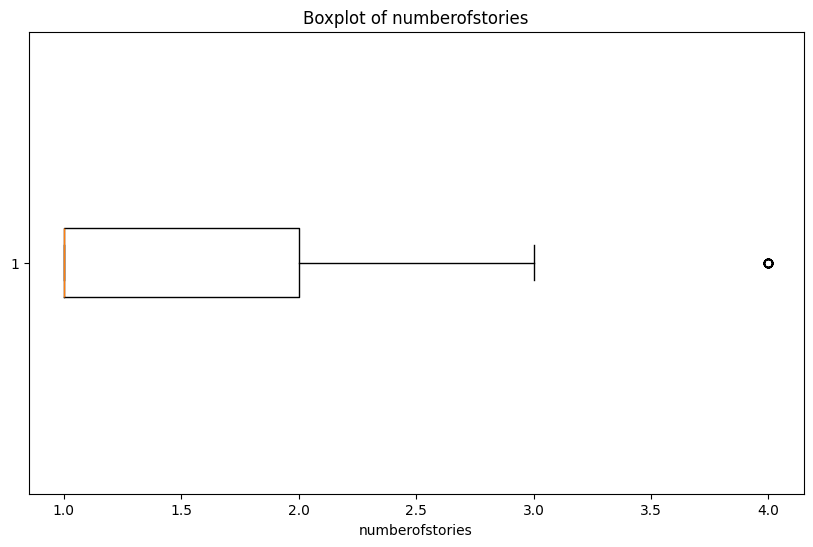

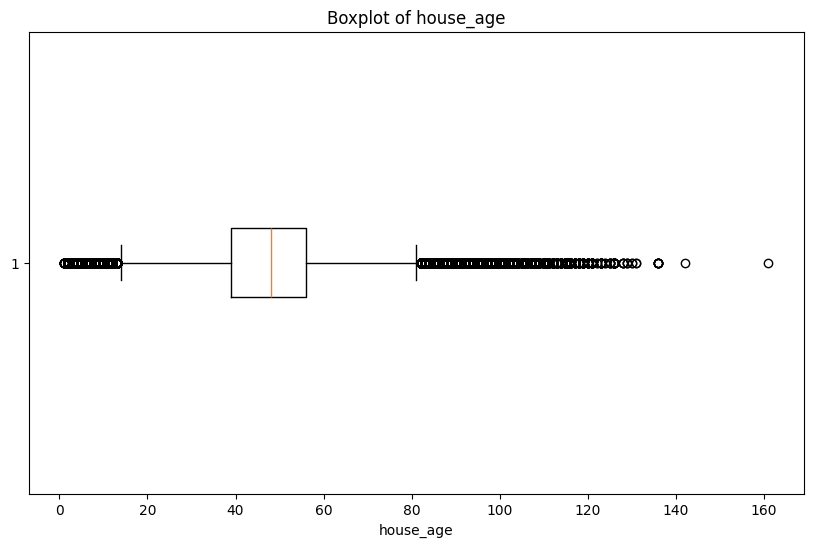

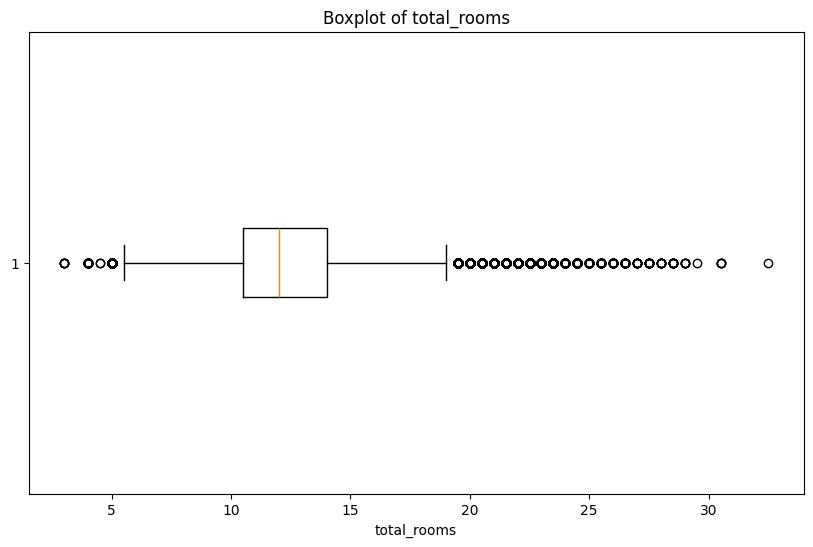

In [110]:
# Plotting boxplots
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(False)
    plt.show()


## Univariate Analysis (Categorical Features)

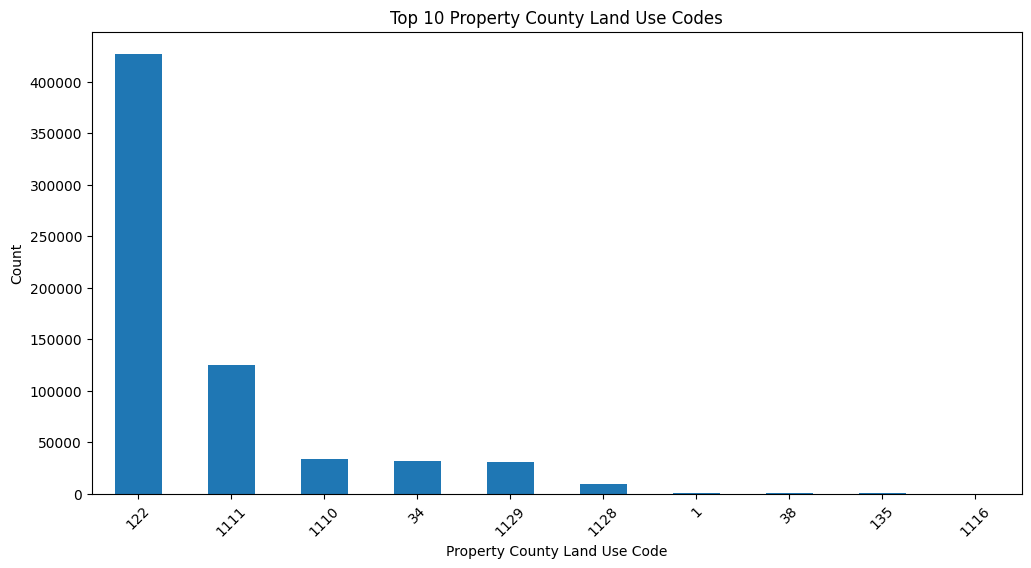

In [111]:
# Plotting the most common propertycountylandusecode categories
plt.figure(figsize=(12, 6))
df['propertycountylandusecode'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Property County Land Use Codes')
plt.xlabel('Property County Land Use Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


## Bivariate Analysis (Feature vs Target Relationships)

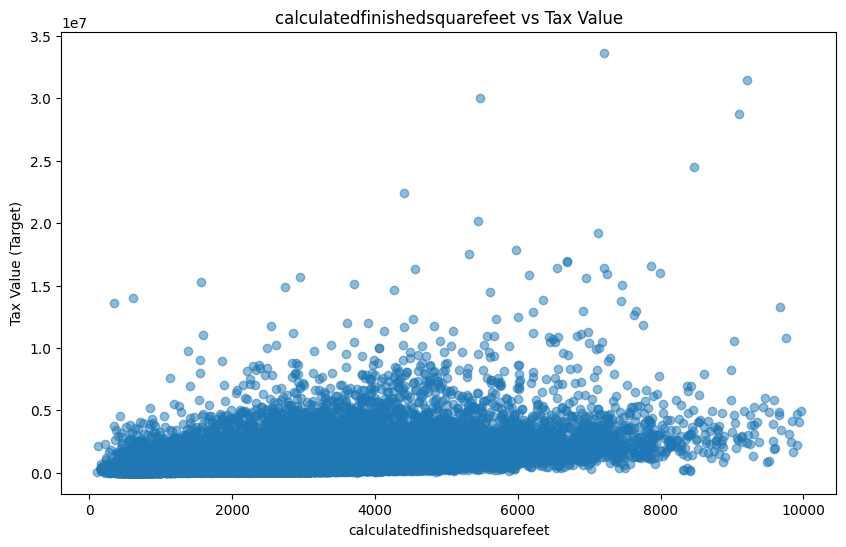

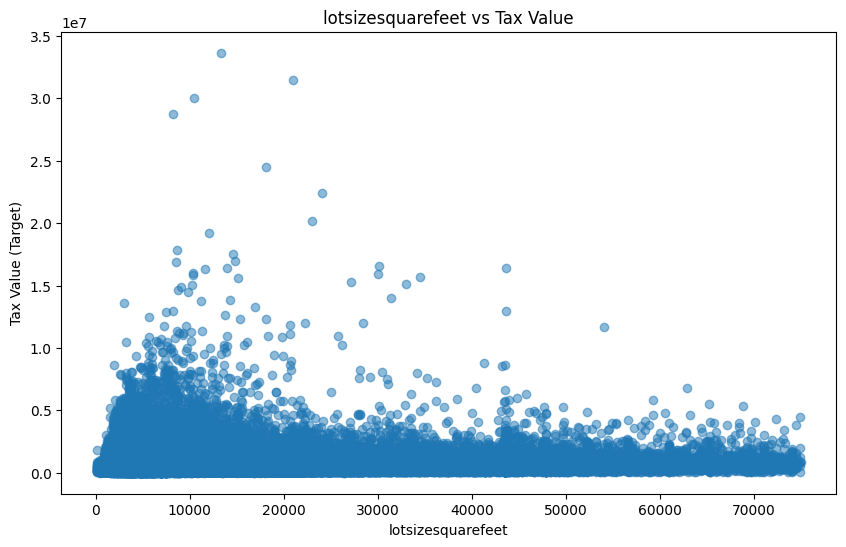

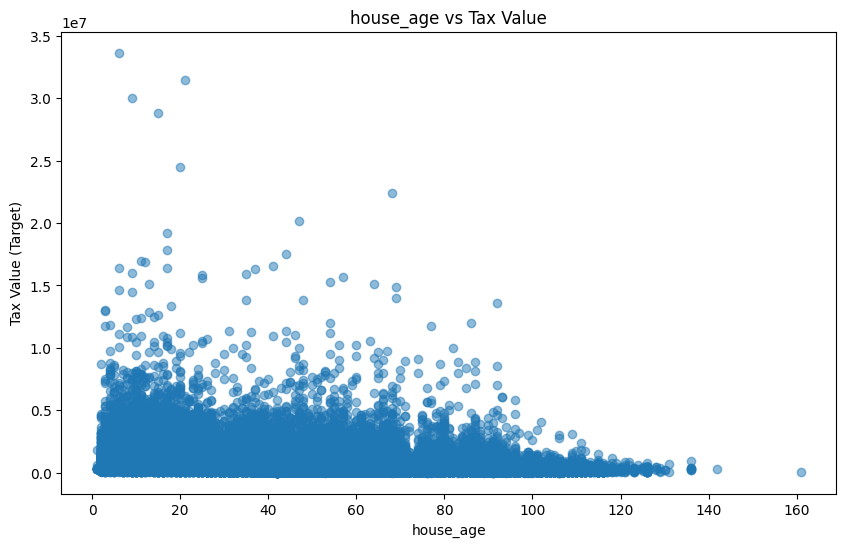

In [112]:
# Scatter plots of selected features vs taxvaluedollarcnt
scatter_cols = ['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'house_age']

for col in scatter_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col], df['taxvaluedollarcnt'], alpha=0.5)
    plt.title(f'{col} vs Tax Value')
    plt.xlabel(col)
    plt.ylabel('Tax Value (Target)')
    plt.grid(False)
    plt.show()


## Boxplots (Categorical vs Target)

<Figure size 1200x600 with 0 Axes>

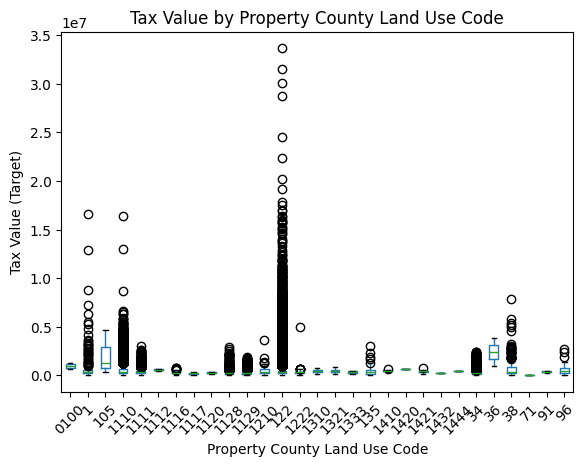

<Figure size 1000x600 with 0 Axes>

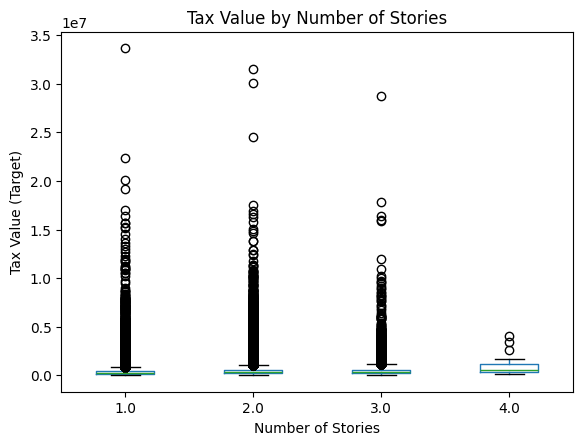

In [113]:
# Boxplot of propertycountylandusecode vs taxvaluedollarcnt
plt.figure(figsize=(12, 6))
df.boxplot(column='taxvaluedollarcnt', by='propertycountylandusecode', grid=False)
plt.title('Tax Value by Property County Land Use Code')
plt.xlabel('Property County Land Use Code')
plt.ylabel('Tax Value (Target)')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

# Boxplot of numberofstories vs taxvaluedollarcnt
plt.figure(figsize=(10, 6))
df.boxplot(column='taxvaluedollarcnt', by='numberofstories', grid=False)
plt.title('Tax Value by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Tax Value (Target)')
plt.suptitle('')
plt.show()


## Correlation Heatmap

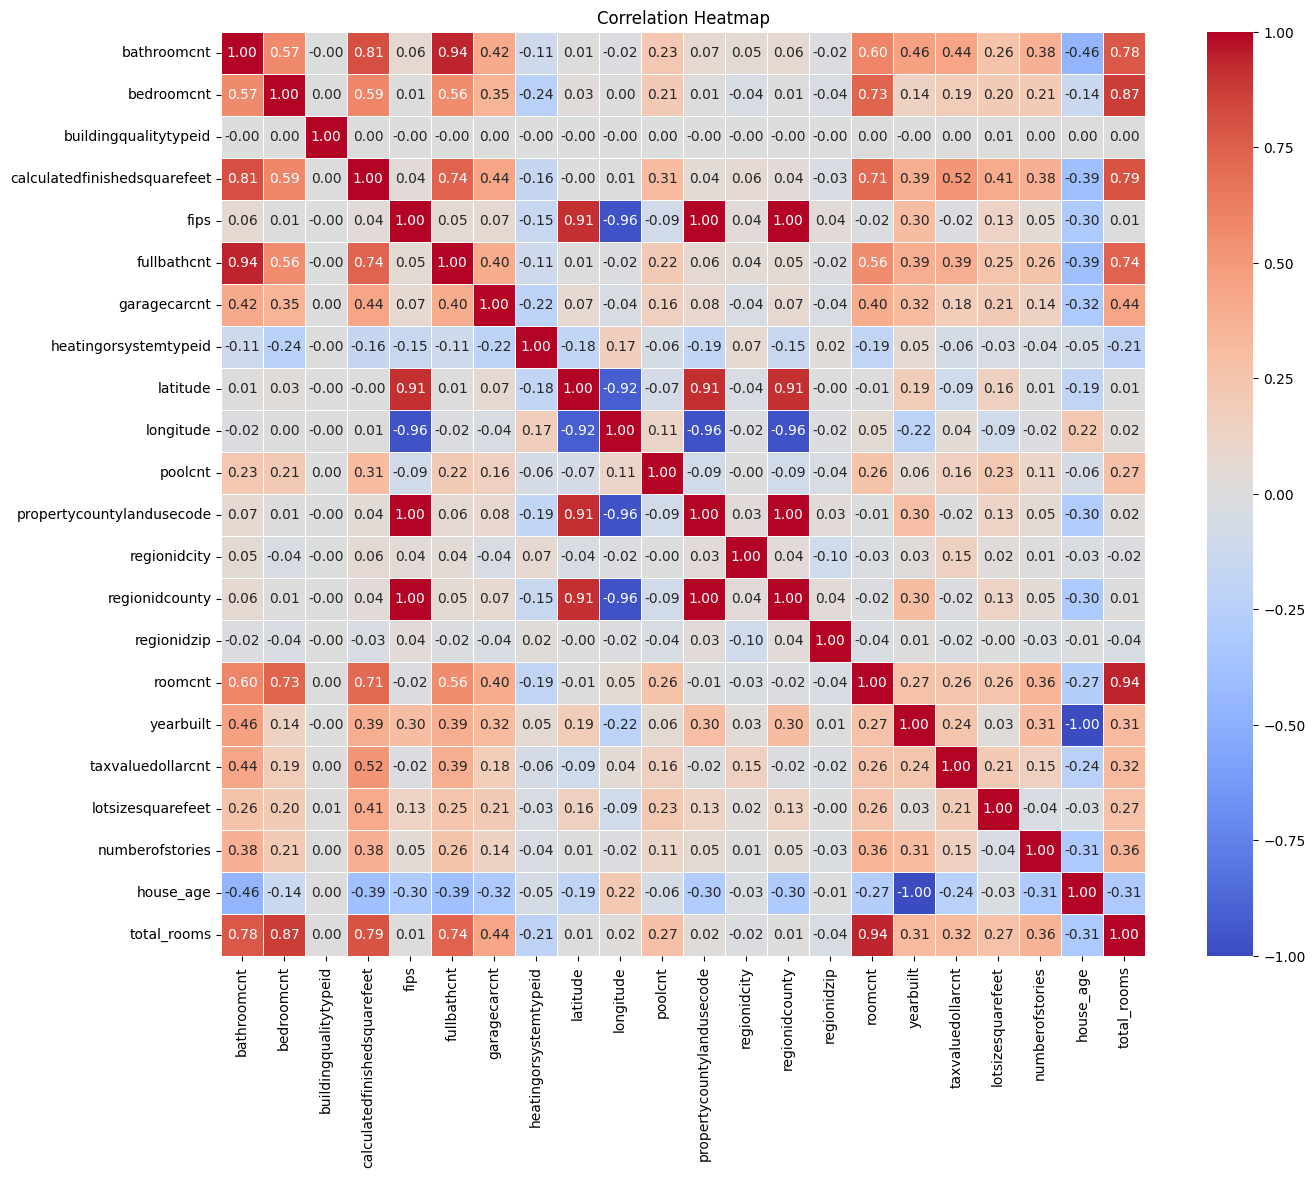

In [114]:
import seaborn as sns

# Creating correlation matrix
corr_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [115]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 659950 entries, 297 to 2973763
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bathroomcnt                   659950 non-null  float64
 1   bedroomcnt                    659950 non-null  float64
 2   buildingqualitytypeid         659950 non-null  float64
 3   calculatedfinishedsquarefeet  659950 non-null  float64
 4   fips                          659950 non-null  float64
 5   fullbathcnt                   659950 non-null  float64
 6   garagecarcnt                  659950 non-null  float64
 7   heatingorsystemtypeid         659950 non-null  float64
 8   latitude                      659950 non-null  float64
 9   longitude                     659950 non-null  float64
 10  poolcnt                       659950 non-null  float64
 11  propertycountylandusecode     659950 non-null  object 
 12  regionidcity                  659950 non-null 

## Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['propertycountylandusecode'] = le.fit_transform(df['propertycountylandusecode'])


## Scaling

In [117]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = [
    'bathroomcnt', 'bedroomcnt', 'fullbathcnt', 'garagecarcnt',
    'poolcnt', 'roomcnt', 'numberofstories', 'house_age',
    'total_rooms', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet'
]

# Initialize scaler
scaler = StandardScaler()

# Scale only selected columns
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [118]:
# Target
y = df['taxvaluedollarcnt']

# Features
X = df.drop(columns=['taxvaluedollarcnt'])


In [119]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 659950 entries, 297 to 2973763
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bathroomcnt                   659950 non-null  float64
 1   bedroomcnt                    659950 non-null  float64
 2   buildingqualitytypeid         659950 non-null  float64
 3   calculatedfinishedsquarefeet  659950 non-null  float64
 4   fips                          659950 non-null  float64
 5   fullbathcnt                   659950 non-null  float64
 6   garagecarcnt                  659950 non-null  float64
 7   heatingorsystemtypeid         659950 non-null  float64
 8   latitude                      659950 non-null  float64
 9   longitude                     659950 non-null  float64
 10  poolcnt                       659950 non-null  float64
 11  propertycountylandusecode     659950 non-null  int64  
 12  regionidcity                  659950 non-null 

## Train-Test Split

In [120]:
# Define target variable
y = df['taxvaluedollarcnt']

# Define features
X = df.drop(columns=['taxvaluedollarcnt'])


In [121]:
from sklearn.model_selection import train_test_split

# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation results
print(f"XGBoost Results:")
print(f"Mean Absolute Error (MAE): {mae_xgb:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:,.2f}")
print(f"R-squared (R²): {r2_xgb:.4f}")


XGBoost Results:
Mean Absolute Error (MAE): 157,927.08
Root Mean Squared Error (RMSE): 271,972.30
R-squared (R²): 0.5351


In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation results
print(f"Random Forest Results:")
print(f"Mean Absolute Error (MAE): {mae_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")


Random Forest Results:
Mean Absolute Error (MAE): 161,954.28
Root Mean Squared Error (RMSE): 278,319.63
R-squared (R²): 0.5131
